# 0. Get number of Optimal Features for each parameter combination 

In [1]:
import pandas as pd

# Load the Data
df = pd.read_csv('../4-processData/features2.csv')
df.dropna(inplace=True)

In [2]:
# Split the Data
X = df.drop('label', axis=1)
y = df['label']

In [3]:
from sklearn.model_selection import train_test_split

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Test with one combination of parameters

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the RandomForestClassifier
n_estimators = 11
max_leaf_nodes = 12
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=42)

# Perform RFECV with the specified cross-validation strategy
rfecv = RFECV(estimator=rf_classifier, step=1, cv=cv_strategy, n_jobs=-1, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(max_leaf_nodes=12, n_estimators=11,
                                       random_state=42),
      n_jobs=-1, scoring='accuracy')

In [5]:
import numpy as np

# Get the accuracy scores from RFECV
accuracy_scores = rfecv.cv_results_['mean_test_score']
print(accuracy_scores)

# Sort the accuracy scores in descending order
sorted_accuracy_scores = np.sort(accuracy_scores)[::-1]

# Determine the threshold for the top 1% of accuracy scores
threshold = sorted_accuracy_scores[0] - (0.01 * sorted_accuracy_scores[0])
print(threshold)

# Get the selected number of features
optimal_number_features = np.min(np.where(accuracy_scores >= threshold)) + 1
print(optimal_number_features)

print(accuracy_scores[optimal_number_features - 1])

[0.8135878  0.85250583 0.89706682 0.91240287 0.90545843 0.92068765
 0.91238345 0.92068765 0.91653069 0.93325563 0.93461538 0.92486402
 0.92905983 0.92907925 0.90956682 0.9360237  0.92769037 0.92906954
 0.93600427 0.94017094 0.92769037 0.92905012 0.92349456 0.93600427
 0.92627234 0.92905983 0.94155983 0.92488345 0.92491259 0.92907925
 0.92768065 0.92491259 0.9332265  0.93043901 0.93601399 0.92074592
 0.9235237  0.92490287 0.9137432  0.93463481 0.94159868 0.92349456
 0.93185703 0.92909868 0.9402195  0.92488345 0.92349456 0.92493201
 0.92625291 0.93326535 0.92073621 0.93604312 0.93600427 0.93043901
 0.92631119 0.93317793 0.93324592 0.93464452 0.91519037 0.93601399
 0.89710567 0.9291181  0.91792929 0.91797786 0.93327506 0.93327506
 0.92215423]
0.9321826923076924
10
0.9332556332556333


In [6]:
# Fit a RandomForestClassifier on the entire training set
rf_classifier.fit(X_train, y_train)

# Get feature importances from the fitted classifier
feature_importances = rf_classifier.feature_importances_

print(feature_importances)

features_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort the DataFrame by the importance values in descending order
features_ranking = features_df.sort_values(by='importance', ascending=False).reset_index(drop=True).head(optimal_number_features)

# Display the sorted DataFrame
print("Top features based on importance:")
print(features_ranking)

[0.19555589 0.00282334 0.02209258 0.01531076 0.         0.
 0.00505896 0.06791539 0.10575009 0.01208968 0.         0.00430443
 0.01581544 0.00390072 0.05601519 0.02785661 0.00652479 0.
 0.         0.         0.03874389 0.00994485 0.01240008 0.
 0.         0.02947636 0.04948349 0.05347155 0.00396774 0.
 0.00437816 0.         0.         0.00153417 0.01096883 0.
 0.         0.         0.00181767 0.00170162 0.00690828 0.
 0.07367864 0.00223595 0.00172571 0.00173299 0.00977884 0.
 0.         0.00726924 0.02287954 0.01133217 0.02125881 0.00298849
 0.         0.00260227 0.03280592 0.00228473 0.01483183 0.
 0.00922223 0.00333338 0.00589069 0.         0.         0.00833805
 0.        ]
Top features based on importance:
           feature  importance
0        n_samples    0.195556
1       gyro_std_y    0.105750
2       acce_min_z    0.073679
3       gyro_std_x    0.067915
4  gyro_variance_y    0.056015
5      gyro_kurt_z    0.053472
6      gyro_kurt_y    0.049483
7      gyro_skew_y    0.038744
8

In [7]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# # Get the optimal number of features and selected features
# optimal_num_features = rfecv.n_features_
# selected_features_mask = rfecv.support_
# X_train_selected = X_train.loc[:, selected_features_mask]

# print(f'Optimal number of features: {optimal_num_features}')
# print(f'Selected features: {X_train.columns[selected_features_mask]}')

# # Verify cross-validation scores with the selected features using the same strategy
# scores = cross_val_score(rf_classifier, X_train_selected, y_train, cv=cv_strategy, scoring='accuracy')
# print("Cross-validation scores with selected features:", scores)
# print("Mean cross-validation score with selected features:", np.mean(scores))

# # Check max mean test score from RFECV
# max_mean_cv_score = max(rfecv.cv_results_['mean_test_score'])
# print("Max mean cross-validation score from RFECV:", max_mean_cv_score)

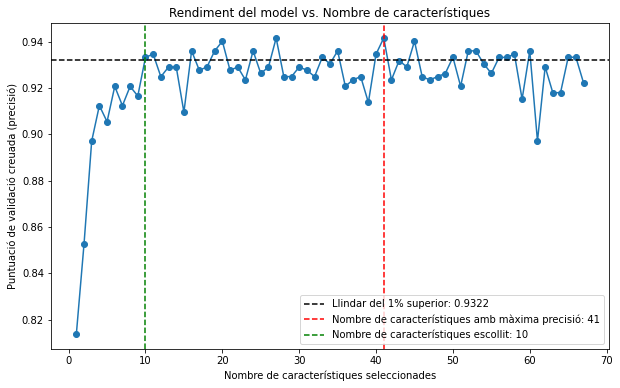

In [10]:
import matplotlib.pyplot as plt

max_acc_num_features = rfecv.n_features_

# Dibuixar el nombre de característiques enfront de les puntuacions de validació creuada
plt.figure(figsize=(10, 6))
plt.xlabel("Nombre de característiques seleccionades")
plt.ylabel("Puntuació de validació creuada (precisió)")

# El cv_results_['mean_test_score'] proporciona les puntuacions de validació creuada
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')

# Calcular el llindar per al 1% superior de les puntuacions de precisió
max_score = max(rfecv.cv_results_['mean_test_score'])
threshold = max_score - (0.01 * max_score)

# Dibuixar la línia horitzontal per al llindar del 1% superior
plt.axhline(y=threshold, color='k', linestyle='--', label=f'Llindar del 1% superior: {threshold:.4f}')

# Dibuixar la línia vertical per a la màxima precisió
plt.axvline(max_acc_num_features, color='r', linestyle='--', label=f'Nombre de característiques amb màxima precisió: {max_acc_num_features}')

# Dibuixar la línia vertical per al nombre de característiques escollit
plt.axvline(optimal_number_features, color='g', linestyle='--', label=f'Nombre de característiques escollit: {optimal_number_features}')

plt.title("Rendiment del model vs. Nombre de característiques")
plt.legend()

plt.savefig('n_optimal_features.png')

plt.show()


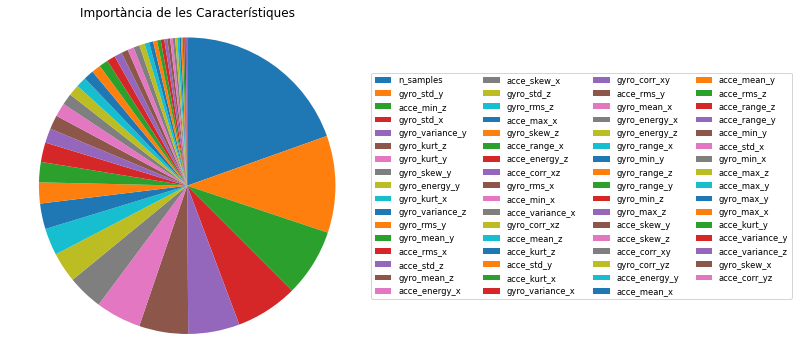

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Obté les importàncies de les característiques
importances = rf_classifier.feature_importances_

# Obté els noms de les característiques
feature_names = X_train.columns

# Ordena les importàncies i els noms de les característiques
sorted_indices = np.argsort(importances)[::-1]  # Ordena de major a menor i obté els índexs ordenats
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Crea el gràfic de pastís
plt.figure(figsize=(10, 6))
patches, labels = plt.pie(sorted_importances, labels=[''] * len(sorted_feature_names), startangle=90, counterclock=False)

# Crea la llegenda amb quatre columnes a la dreta del plot
plt.legend(patches, sorted_feature_names, loc='center left', fontsize='small', bbox_to_anchor=(1, 0.5), ncol=4)

# Oculta els números al plot
plt.axis('equal')
plt.title('Importància de les Característiques')
plt.subplots_adjust(left=0.1, right=0.6)  # Ajusta els marges per centrar tot el conjunt al centre

plt.savefig('feature_importances.png')

plt.show()


# 1. Getting the optimal features for each combination

### Init

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Data
df = pd.read_csv('../4-processData/features2.csv')
df.dropna(inplace=True)

# Split the Data
X = df.drop('label', axis=1)
y = df['label']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Functions

In [4]:
import numpy as np

def get_optimal_number_features(rfecv):
    # Get the accuracy scores from RFECV
    accuracy_scores = rfecv.cv_results_['mean_test_score']

    # Sort the accuracy scores in descending order
    sorted_accuracy_scores = np.sort(accuracy_scores)[::-1]

    # Determine the threshold for the top 1% of accuracy scores
    threshold = sorted_accuracy_scores[0] - (0.01 * sorted_accuracy_scores[0])

    # Return the selected number of features
    return np.min(np.where(accuracy_scores >= threshold)) + 1

### Main program

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# Define the range of values for n_estimators and max_leaf_nodes
n_estimators_range = range(10, 51)
max_leaf_nodes_range = range(10, 51)

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# DataFrame to store the results
results_columns = ['n_estimators', 'max_leaf_nodes', 'max_acc_n_features', 'optimal_n_features', 'accuracy']
results_columns.extend(X_train.columns)
results = []

# Iterate over all combinations of n_estimators and max_leaf_nodes
for n_estimators in n_estimators_range:
    for max_leaf_nodes in max_leaf_nodes_range:
        print(f'Running RFECV for n_estimators={n_estimators}, max_leaf_nodes={max_leaf_nodes}')

        # Define the RandomForestClassifier
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators,
                                               max_leaf_nodes=max_leaf_nodes,
                                               random_state=42)

        # Perform RFECV with the specified cross-validation strategy
        rfecv = RFECV(estimator=rf_classifier,
                      step=1,
                      cv=cv_strategy,
                      n_jobs=-1,
                      scoring='accuracy')
        rfecv.fit(X_train, y_train)

        # Get the number of features with maximum accuracy 
        max_acc_n_features = rfecv.n_features_

        # Get the optimal number of features
        optimal_n_features = get_optimal_number_features(rfecv)

        # Get the accuracy score
        accuracy_scores = rfecv.cv_results_['mean_test_score']
        accuracy = accuracy_scores[optimal_n_features - 1]

        # Get the feature importances
        rf_classifier.fit(X_train, y_train)
        feature_importances = rf_classifier.feature_importances_

        # Create a result row
        result_row = {
            'n_estimators': n_estimators,
            'max_leaf_nodes': max_leaf_nodes,
            'max_acc_n_features': max_acc_n_features,
            'optimal_n_features': optimal_n_features,
            'accuracy': accuracy
        }
        for i, feature in enumerate(X_train.columns):
            result_row[feature] = feature_importances[i]

        # Append the results to the DataFrame
        results.append(result_row)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

Running RFECV for n_estimators=11, max_leaf_nodes=12


In [14]:
# Store the results
# results_df.to_csv('opt_results.csv', index=False)

In [21]:
results_df

,n_estimators,max_leaf_nodes,max_acc_n_features,optimal_n_features,accuracy_optimal,accuracy_max,n_samples,gyro_mean_x,gyro_mean_y,gyro_mean_z,...,gyro_energy_z,acce_energy_x,acce_energy_y,acce_energy_z,gyro_corr_xy,gyro_corr_xz,gyro_corr_yz,acce_corr_xy,acce_corr_xz,acce_corr_yz
0,11,12,41,10,0.933256,0.933256,0.195556,0.002823,0.022093,0.015311,...,0.002285,0.014832,0.0,0.009222,0.003333,0.005891,0.0,0.0,0.008338,0.0


# 2. Plotting the data

In [1]:
import pandas as pd

results_df = pd.read_csv('opt_results.csv')

### Representation of number of features per combination 

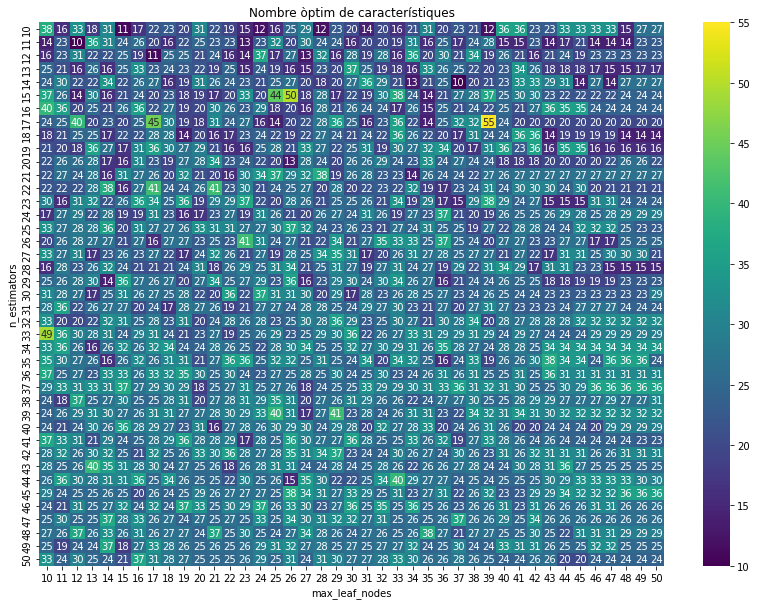

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gira el DataFrame per crear una matriu de 'optimal_n_features'
taula_pivot = results_df.pivot(index='n_estimators', columns='max_leaf_nodes', values='optimal_n_features')

# Crea el mapa de calor
plt.figure(figsize=(14, 10))
mapa_calor = sns.heatmap(taula_pivot, annot=True, fmt='g', cmap='viridis')

# Afegeix etiquetes i títol
plt.title('Nombre òptim de característiques')
plt.xlabel('max_leaf_nodes')
plt.ylabel('n_estimators')

# Desa la figura sense marges
# plt.savefig('heatmap_opt_num_feat.png', bbox_inches='tight', pad_inches=0)

plt.show()


### Representation of max accuracy number of features per combination 

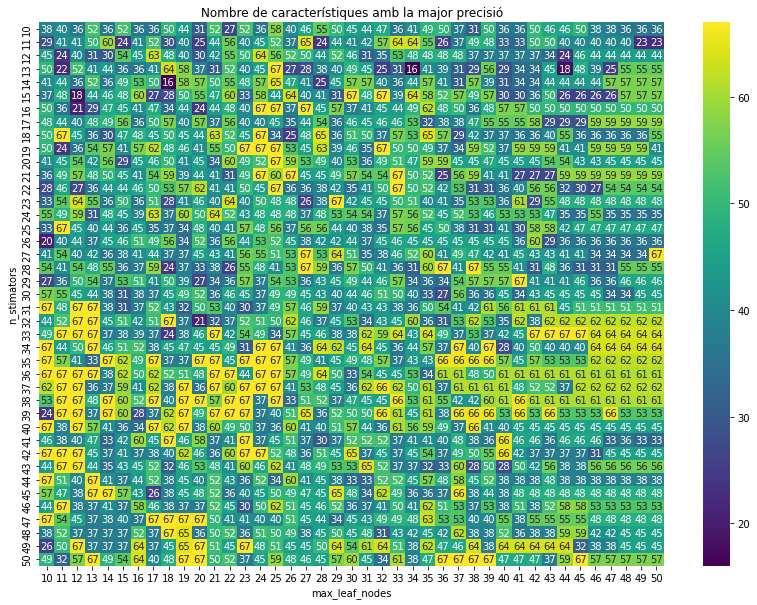

In [3]:
# Gira el DataFrame per crear una matriu del 'max_acc_n_features'
taula_pivot = results_df.pivot(index='n_estimators', columns='max_leaf_nodes', values='max_acc_n_features')

# Crea el mapa de calor
plt.figure(figsize=(14, 10))
mapa_calor = sns.heatmap(taula_pivot, annot=True, fmt='g', cmap='viridis')

# Afegeix etiquetes i títol
plt.title('Nombre de característiques amb la major precisió')
plt.xlabel('max_leaf_nodes')
plt.ylabel('n_stimators')

# plt.savefig('heatmap_max_num_feat.png', bbox_inches='tight', pad_inches=0)

plt.show()

Estadístiques per optimal_n_features:
Mínim: 10.0
Màxim: 55.0
Mediana: 26.0
Quartil 1 (Q1): 23.0
Quartil 3 (Q3): 30.0

Estadístiques per max_acc_n_features:
Mínim: 16.0
Màxim: 67.0
Mediana: 47.0
Quartil 1 (Q1): 38.0
Quartil 3 (Q3): 56.0



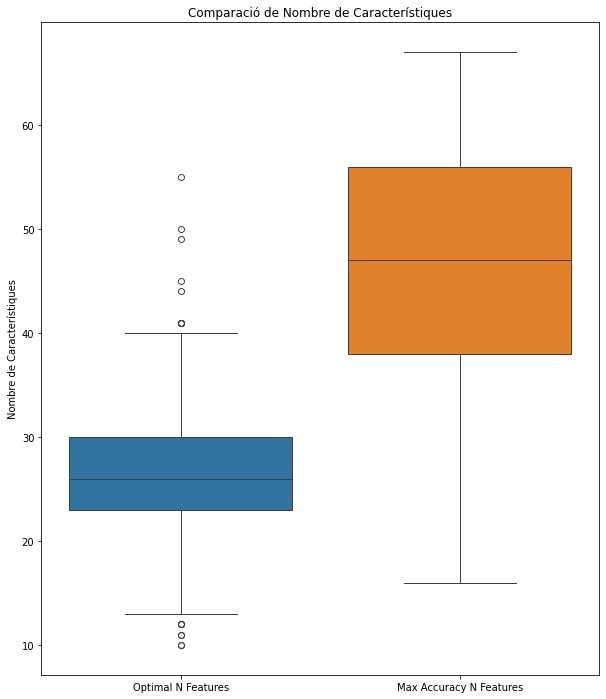

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suposant que el DataFrame results_df ja està creat

# Crea un nou DataFrame per facilitar la visualització amb box plots
data_to_plot = results_df[['optimal_n_features', 'max_acc_n_features']]

# Crea els box plots
plt.figure(figsize=(10,12))
box_plot = sns.boxplot(data=data_to_plot)

# Afegeix etiquetes i títol
plt.title('Comparació de Nombre de Característiques')
plt.ylabel('Nombre de Característiques')
plt.xticks([0, 1], ['Optimal N Features', 'Max Accuracy N Features'])

# Imprimir valors estadístics
def print_stat_values(data, col_name):
    y_min = data[col_name].min()
    y_max = data[col_name].max()
    y_median = data[col_name].median()
    y_q1 = data[col_name].quantile(0.25)
    y_q3 = data[col_name].quantile(0.75)
    print(f'Estadístiques per {col_name}:')
    print(f'Mínim: {y_min:.1f}')
    print(f'Màxim: {y_max:.1f}')
    print(f'Mediana: {y_median:.1f}')
    print(f'Quartil 1 (Q1): {y_q1:.1f}')
    print(f'Quartil 3 (Q3): {y_q3:.1f}')
    print('')

# Imprimir valors per cada columna
print_stat_values(data_to_plot, 'optimal_n_features')
print_stat_values(data_to_plot, 'max_acc_n_features')

# plt.savefig('boxplot_n_features.png', bbox_inches='tight', pad_inches=0.2)

# Mostrar el gràfic
plt.show()


### Representation of accuracy per combination (using optimal_n_features) 

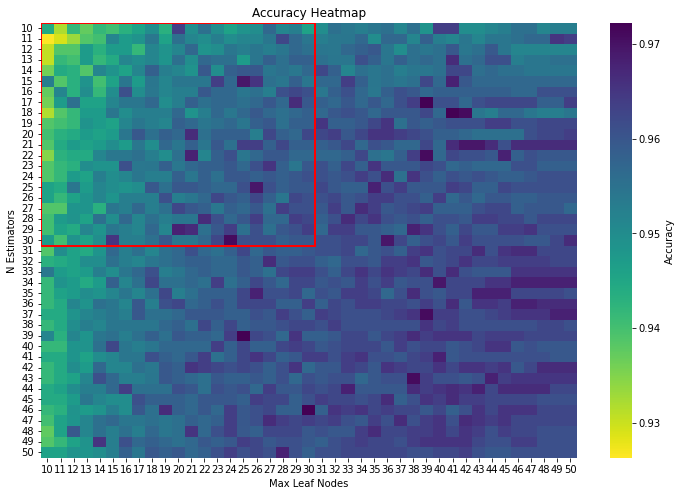

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming results_df is already defined

# Filter the DataFrame for rows where n_estimators and max_leaf_nodes are both less than 30
filtered_df = results_df[(results_df['n_estimators'] < 30) & (results_df['max_leaf_nodes'] < 30)]

# Sort the filtered DataFrame by the 'accuracy' column in descending order and select the top 30 rows
top_df = filtered_df.nlargest(30, 'accuracy')

# Select the desired columns (this step is optional and for clarity)
top_df = top_df[['n_estimators', 'max_leaf_nodes', 'optimal_n_features', 'accuracy']]

# Pivot the DataFrame to create a matrix of accuracy
pivot_table = results_df.pivot(index='n_estimators', columns='max_leaf_nodes', values='accuracy')

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, annot=False, cmap='viridis_r', cbar_kws={'label': 'Accuracy'})

# Add labels and title
plt.title('Accuracy Heatmap')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('N Estimators')

# Draw the rectangle on the heatmap
# Coordinates for the rectangle
rect_x = 0  # starts from max_leaf_nodes = 10
rect_y = 0  # starts from n_estimators = 10
rect_width = 21  # from max_leaf_nodes = 10 to max_leaf_nodes = 30
rect_height = 21  # from n_estimators = 10 to n_estimators = 30

# Add the rectangle
plt.gca().add_patch(plt.Rectangle((rect_x, rect_y), rect_width, rect_height, fill=False, edgecolor='red', linewidth=2))

plt.savefig('accuracy_10_to_30.png', bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()


In [19]:
# Filter the DataFrame for rows where n_estimators and max_leaf_nodes are both less than 30
filtered_df = results_df[(results_df['n_estimators'] <= 30) & (results_df['max_leaf_nodes'] <= 30)]

# Sort the filtered DataFrame by the 'accuracy' column in descending order and select the top 30 rows
top_df = filtered_df.nlargest(10, 'accuracy')

# Select the desired columns
top_df = top_df[['n_estimators', 'max_leaf_nodes', 'optimal_n_features', 'accuracy']]

print(top_df)


     n_estimators  max_leaf_nodes  optimal_n_features  accuracy
834            30              24                  37  0.970794
220            15              25                  44  0.969406
631            25              26                  37  0.969406
503            22              21                  41  0.968017
789            29              20                  27  0.968017
306            17              29                  36  0.966628
421            20              21                  34  0.966628
790            29              21                  34  0.966628
750            28              22                  26  0.966608
221            15              26                  50  0.965258


# 3. Calculating memory usage

In [4]:
import pandas as pd

results_df = pd.read_csv('opt_results.csv')

In [5]:
results_df

,n_estimators,max_leaf_nodes,max_acc_n_features,optimal_n_features,accuracy,n_samples,gyro_mean_x,gyro_mean_y,gyro_mean_z,acce_mean_x,...,gyro_energy_z,acce_energy_x,acce_energy_y,acce_energy_z,gyro_corr_xy,gyro_corr_xz,gyro_corr_yz,acce_corr_xy,acce_corr_xz,acce_corr_yz
0,10,10,38,38,0.944386,0.170144,0.003277,0.022573,0.017875,0.000000,...,0.002645,0.013658,0.000000,0.008683,0.000000,0.006743,0.000000,0.000000,0.002595,0.000000
1,10,11,40,16,0.931876,0.171194,0.003184,0.022046,0.017276,0.000000,...,0.002556,0.013292,0.000000,0.008476,0.000000,0.006603,0.000000,0.000000,0.002545,0.000000
2,10,12,36,33,0.941589,0.167639,0.003106,0.024302,0.016842,0.000000,...,0.002513,0.016315,0.000000,0.010144,0.003667,0.006480,0.000000,0.000000,0.002497,0.000000
3,10,13,52,18,0.937374,0.164838,0.003039,0.023894,0.016518,0.000000,...,0.002475,0.018593,0.000000,0.009935,0.003558,0.006366,0.000000,0.000000,0.002454,0.000000
4,10,14,36,31,0.941599,0.164461,0.002978,0.023578,0.016243,0.000000,...,0.002448,0.019516,0.001415,0.009767,0.003464,0.006276,0.000000,0.000000,0.005809,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,50,46,57,24,0.961053,0.153457,0.004186,0.036936,0.025256,0.010349,...,0.008120,0.017562,0.007388,0.013159,0.005449,0.006492,0.002697,0.002040,0.014369,0.004107
1677,50,47,57,24,0.961053,0.153329,0.004181,0.036921,0.025242,0.010343,...,0.008116,0.017542,0.007381,0.013159,0.005443,0.006480,0.002693,0.002038,0.014388,0.004159
1678,50,48,57,24,0.961053,0.153179,0.004176,0.036892,0.025224,0.010360,...,0.008110,0.017578,0.007370,0.013145,0.005429,0.006472,0.002688,0.002035,0.014393,0.004151
1679,50,49,57,24,0.961053,0.153147,0.004173,0.036885,0.025218,0.010356,...,0.008107,0.017568,0.007366,0.013144,0.005425,0.006460,0.002685,0.002035,0.014389,0.004150


### Calculating a memory usage estimation

In [5]:
import numpy as np

# Functions to estimate memory usage
def estimate_tree_memory_usage(tree):
    num_nodes = tree.tree_.node_count
    feature_size = np.dtype(np.int32).itemsize  # Size of feature index
    threshold_size = np.dtype(np.float64).itemsize  # Size of threshold value
    pointer_size = np.dtype(np.intp).itemsize  # Size of pointers to children
    node_size = feature_size + threshold_size + 2 * pointer_size  # Total size per node
    memory_usage = num_nodes * node_size
    return memory_usage

def estimate_forest_memory_usage(forest, num_features):
    total_memory_usage = 0
    for estimator in forest.estimators_:
        total_memory_usage += estimate_tree_memory_usage(estimator)

    # Include memory cost for feature calculations
    feature_cost = np.dtype(np.float64).itemsize
    total_memory_usage += num_features * feature_cost
    
    return total_memory_usage

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Calculate estimated memory usage for each combination
estimated_memory_usages = []

for index, row in results_df.iterrows():
    n_estimators = int(row['n_estimators'])
    max_leaf_nodes = int(row['max_leaf_nodes'])  # Convert to integer
    num_features = int(row['optimal_n_features'])  # Convert to integer

    print(f"Processing row {index}: n_estimators={n_estimators}, max_leaf_nodes={max_leaf_nodes}, num_features={num_features}")

    # Extract the feature importances for the current combination
    max_optimal_n_features = 67
    feature_importances = row.iloc[5:5+max_optimal_n_features].values
    sorted_indices = np.argsort(feature_importances)[::-1]

    # Create a binary mask to select the top 'num_features' features
    feature_mask = np.zeros(len(feature_importances), dtype=bool)
    feature_mask[sorted_indices[:num_features]] = True

    # Select the top 'num_features' columns from X_train
    selected_features = X_train.columns[feature_mask]
    X_subset = X_train[selected_features]

    # Train the RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes)
    rf_classifier.fit(X_subset, y_train)
    
    # Estimate memory usage
    mem_usage = estimate_forest_memory_usage(rf_classifier, num_features)
    
    # Convert memory usage to KB
    mem_usage_kb = mem_usage / 1024
    estimated_memory_usages.append(mem_usage_kb)

# Add estimated memory usage to the DataFrame
results_df['estimated_memory_usage_kb'] = estimated_memory_usages


Processing row 0: n_estimators=10, max_leaf_nodes=10, num_features=38
Processing row 1: n_estimators=10, max_leaf_nodes=11, num_features=16
Processing row 2: n_estimators=10, max_leaf_nodes=12, num_features=33
Processing row 3: n_estimators=10, max_leaf_nodes=13, num_features=18
Processing row 4: n_estimators=10, max_leaf_nodes=14, num_features=31
Processing row 5: n_estimators=10, max_leaf_nodes=15, num_features=11
Processing row 6: n_estimators=10, max_leaf_nodes=16, num_features=17
Processing row 7: n_estimators=10, max_leaf_nodes=17, num_features=22
Processing row 8: n_estimators=10, max_leaf_nodes=18, num_features=23
Processing row 9: n_estimators=10, max_leaf_nodes=19, num_features=20
Processing row 10: n_estimators=10, max_leaf_nodes=20, num_features=31
Processing row 11: n_estimators=10, max_leaf_nodes=21, num_features=22
Processing row 12: n_estimators=10, max_leaf_nodes=22, num_features=19
Processing row 13: n_estimators=10, max_leaf_nodes=23, num_features=15
Processing row 1

In [11]:
df_acc_mem = results_df[['n_estimators', 'max_leaf_nodes', 'optimal_n_features', 'accuracy', 'estimated_memory_usage_kb']]

In [12]:
# Store the results
# df_acc_mem.to_csv('df_acc_mem.csv', index=False)

In [2]:
import pandas as pd

df_acc_mem = pd.read_csv('df_acc_mem.csv')

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate features and target variable
X = df_acc_mem[['n_estimators', 'max_leaf_nodes', 'optimal_n_features']]
y = df_acc_mem['estimated_memory_usage_kb']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display the results
importance_df = pd.DataFrame({
    'Feature': ['n_estimators', 'max_leaf_nodes', 'optimal_n_features'],
    'Coefficient': coefficients
})

print(importance_df)
print(f"Intercept: {intercept}")

              Feature  Coefficient
0        n_estimators     1.569852
1      max_leaf_nodes     1.519712
2  optimal_n_features     0.007788
Intercept: -45.29670640123347


### Representations

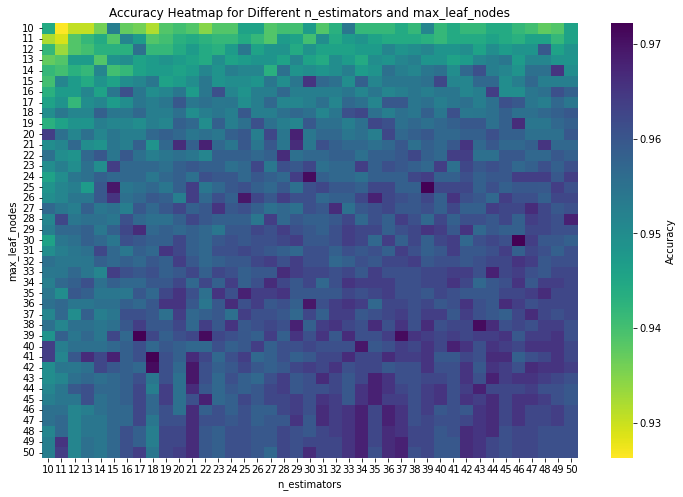

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = df_acc_mem.pivot(index='max_leaf_nodes', columns='n_estimators', values='accuracy')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap="viridis_r", cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Heatmap for Different n_estimators and max_leaf_nodes')
plt.xlabel('n_estimators')
plt.ylabel('max_leaf_nodes')
plt.show()

Gràfic repetit més amunt. Treure el de dalt en principi.

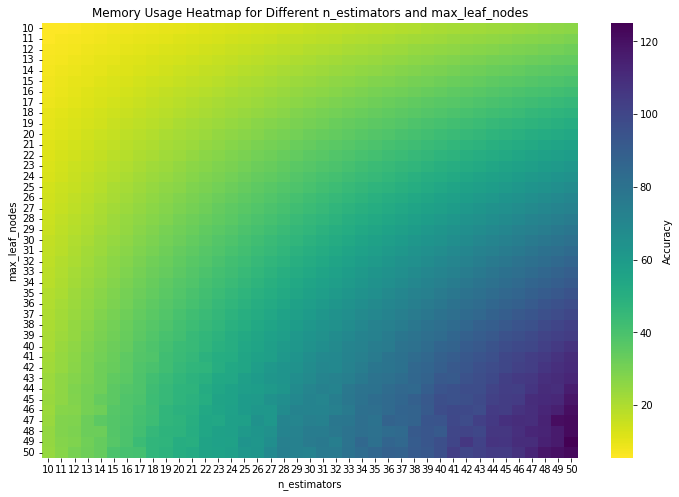

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = results_df.pivot(index='max_leaf_nodes', columns='n_estimators', values='estimated_memory_usage_kb')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap="viridis_r", cbar_kws={'label': 'Accuracy'})
plt.title('Memory Usage Heatmap for Different n_estimators and max_leaf_nodes')
plt.xlabel('n_estimators')
plt.ylabel('max_leaf_nodes')
plt.show()

Comentar que num features no afecta practicament a lús de memòria en comparació amb els altres dos paràmetres

# 4. Getting the best combinations

In [1]:
import pandas as pd

df_acc_mem = pd.read_csv('df_acc_mem.csv')

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Define the weights
alpha = 16   # Weight for Accuracy
beta = 0.1  # Weight for Memory Usage

# Normalize the estimated memory usage
scaler = MinMaxScaler()
df_acc_mem['normalized_memory_usage'] = scaler.fit_transform(df_acc_mem[['estimated_memory_usage_kb']])

# Add a new column 'score' to the DataFrame based on the weighted formula
df_acc_mem['score'] = alpha * df_acc_mem['accuracy'] - beta * df_acc_mem['normalized_memory_usage']

# Normalize the score
df_acc_mem['normalized_score'] = scaler.fit_transform(df_acc_mem[['score']])

# Adjust pandas display settings to fit the table in one row
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Print the top 10 combinations based on the normalized score
top_10_combinations = df_acc_mem.nlargest(10, 'normalized_score')

# Format the estimated memory usage and normalized score to two decimal places
top_10_combinations['estimated_memory_usage_kb'] = top_10_combinations['estimated_memory_usage_kb'].round(2)
top_10_combinations['normalized_score'] = top_10_combinations['normalized_score'].round(2)

# Rename columns to shorter names
top_10_combinations.rename(columns={
    'n_estimators': 'n_est',
    'max_leaf_nodes': 'max_leaf',
    'optimal_n_features': 'opt_feat',
    'estimated_memory_usage_kb': 'mem_kb',
    'normalized_score': 'norm_score'
}, inplace=True)

# Print the top 10 combinations without index
print(top_10_combinations[['n_est', 'max_leaf', 'opt_feat', 'accuracy', 'mem_kb', 'norm_score']].to_string(index=False))


 n_est  max_leaf  opt_feat  accuracy  mem_kb  norm_score
    17        39        55  0.972203   35.84        1.00
    18        41        36  0.972213   38.62        1.00
    39        25        40  0.972193   52.57        0.98
    30        24        37  0.970794   38.84        0.96
    18        42        36  0.970824   40.04        0.96
    22        39        31  0.970794   46.51        0.96
    15        25        44  0.969406   20.44        0.96
    46        30        36  0.972193   74.49        0.95
    25        26        37  0.969406   35.15        0.94
    21        42        27  0.969406   47.00        0.92


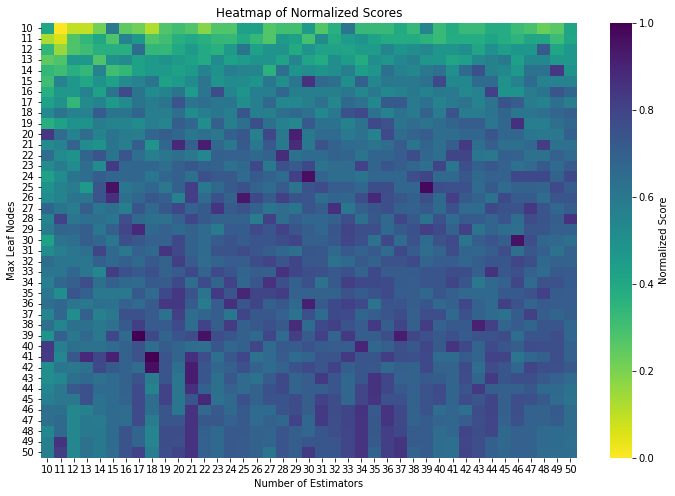

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame to get n_estimators and max_leaf_nodes as axes
heatmap_data = df_acc_mem.pivot(index='max_leaf_nodes', columns='n_estimators', values='normalized_score')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="viridis_r", cbar_kws={'label': 'Normalized Score'})
plt.title('Heatmap of Normalized Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Leaf Nodes')

plt.savefig('weights16x01.png', bbox_inches='tight', pad_inches=0.2)

plt.show()

END

# 5. Getting the selected models

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load the Data
df = pd.read_csv('../4-processData/features2.csv')
df.dropna(inplace=True)

# Split the Data
X = df.drop('label', axis=1)
y = df['label']

In [33]:
len(X.columns)

67

In [34]:
# Load the optimal features DataFrame
opt_results = pd.read_csv('opt_results.csv')

In [51]:
# Select the parameters
n_estimators = 17
max_leaf_nodes = 39

In [52]:
# Get optimal features list
row = opt_results.loc[(opt_results['n_estimators'] == n_estimators) & (opt_results['max_leaf_nodes'] == max_leaf_nodes)]
row_features = row.iloc[0, 5:]
sorted_features = row_features.sort_values(ascending=False)
num_features = int(row.iloc[0]['optimal_n_features'])
optimal_features_values = sorted_features.head(num_features)
optimal_features = optimal_features_values.index.to_list()

In [53]:
len(optimal_features)

55

In [54]:
from sklearn.model_selection import train_test_split

# Select the optimal features
X_optimal = X[optimal_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_optimal, y, test_size=0.2, random_state=42)


# Create the Random Forest classifier with the specified parameters
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=39, n_estimators=17, random_state=42)

In [55]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9611111111111111


In [27]:
from sklearn.tree import _tree
import numpy as np

# Define the function tree_to_code (From https://mljar.com/blog/extract-rules-decision-tree/)
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    code = []

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = f'self.{feature_name[node]}'
            threshold = tree_.threshold[node]
            code.append("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            code.append("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            code.append("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    return code

In [28]:
def code_init(optimal_features):
    code = []

    code.append('\n    def __init__(self):')
    code.append('        pass')

    # Append score header
    params = ''
    for feature in optimal_features:
        params += f', {feature}'

    code.append(f'\n    def score(self{params}):')

    # Append score body
    for feature in optimal_features:
        code.append(f'    self.{feature} = {feature}')
    
    code.append('')

    for i, _ in enumerate(rf_classifier.estimators_):
        code.append(f'    v{i} = self.decision_tree_{i}()')

    code.append(f"\n        trees_values = [{', '.join(f'v{i}' for i, _ in enumerate(rf_classifier.estimators_))}]")
    code.append(f'\n        return [sum(col) / len(col) for col in zip(*trees_values)]')

    return code


In [29]:
# Define header for each tree file
header = '''\
    def decision_tree_{tree_number}(self):
'''

filename = f'trees{n_estimators}x{max_leaf_nodes}x{num_features}.py'

with open(filename, 'w') as f:
    f.write('class RandomForestOptimized:')
    code_init = code_init(optimal_features)
    for line in code_init:
        f.write('    ' + line + '\n')
    f.write('\n')

    # Extract and save each tree
    for i, tree in enumerate(rf_classifier.estimators_):
        code = tree_to_code(tree, feature_names=optimal_features)
        feature_names = ', '.join(X.columns.tolist())

        f.write(header.format(tree_number=i, feature_names=feature_names))
        for line in code:
            # Adjusting formatting
            line = line.replace("[[", "[").replace("]]", "]")
            if "return" in line:
                line = line.replace(".", ",")
            f.write('    ' + line + '\n')
        f.write('\n')


In [30]:
def code_stats(optimal_features):
    code = []

    if 'n_samples' in optimal_features:
        code.append('n_samples = len(gyr_set)')
    
    for feature in optimal_features:
        if feature != 'n_samples':
            [sensor, calc, axis] = feature.split('_')
            if calc == 'corr':
                code.append(f'{sensor}_{calc}_{axis} = statistics.{calc}({sensor}_{axis[0]}, {sensor}_{axis[1]})')
            else:
                code.append(f'{sensor}_{calc}_{axis} = statistics.{calc}({sensor}_{axis})')

    params = ''
    for i, feature in enumerate(optimal_features):
        if i == 0:
            params += feature
        else:
            params += f', {feature}'

    code.append(f'\n    score = randomForestOptimized.score({params})')

    return code

In [31]:
with open('stats_calc.py', 'w') as f:
    f.write('    statistics = Statistics()\n\n')
    
    code_stats = code_stats(optimal_features)
    for line in code_stats:
        f.write('    ' + line + '\n')
    f.write('\n')